# Plotly
## **Data Visualization**

Data Visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

## Plotly 

`Plotly` is a Python library which is used to design graphs, especially interactive graphs. 
- It can plot various graphs and charts like histogram, barplot, boxplot, spreadplot, and many more. 
- It is mainly used in data analysis as well as financial analysis. Plotly is an interactive visualization library.

### Benefits of using plolty:

- Plotly is interactive, the graphs can be zoomed in and out, downloaded as a PNG file, hovered over to see the data points, and much more.
- Plotly is compatible with Pandas DataFrames, making it easy to plot data directly from CSVs.
- Plotly can help making animated plots, which can be very useful for visualizing data over time.
- Plotly can be used to style interactive graphs with Jupyter notebook.
- Plotly with dash is a great choice for creating interactive dashboards that can be deployed on the web.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# read diamond dataset
df = pd.read_csv('../00_datasets/diamonds.csv')
print(df.shape)
df = df.sample(frac=0.1, random_state=10)  # sample 10% of the data - random_state for getting same results each time we run the code
print(df.shape)

(53940, 10)
(5394, 10)


In [7]:
df.head()

carat        cut color clarity  depth  table  price     x     y     z
8018    1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1583    0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
9138    1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
2787    0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
52429   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

In [8]:
# drop index column / reindex the data
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
2   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
3   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
4   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

In [10]:
# Scatter plot using plotly
fig = px.scatter(df, x='carat', y='price')
fig.show()


In [11]:
# line plot using plotly
fig = px.line(df, x='carat', y='price')
fig.show()

In [12]:
# scatter plot with legends
fig = px.scatter(df, x='carat', y='price', color='cut')
fig.show()

In [13]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut', 
                 title='Scatter Plot of Carat vs Price by Cut',
                 labels={'carat': 'Carat Weight', 'price': 'Price ($)', 'cut': 'Cut Quality'},
                 )
fig.show()

In [14]:
# plot a line chart by taking mean price of carat
df_mean = df.groupby('carat')['price'].mean().reset_index()
# print(df_mean)

# line chart using plotly
fig = px.line(df_mean, x='carat', y='price', 
              title='Mean Price of Diamonds by Carat',
              labels={'carat': 'Carat Weight', 'price': 'Mean Price ($)'},
              )
fig.show()

<Axes: xlabel='cut', ylabel='price'>

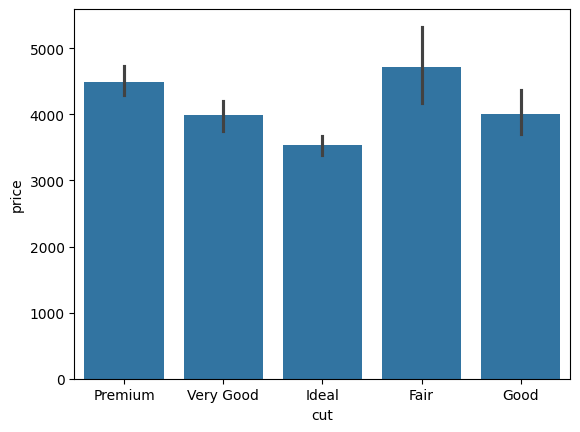

In [15]:
sns.barplot(x='cut', y='price', data=df, estimator=np.mean)

In [16]:
# bar plot using plotly, of mean price by cut
fig = px.bar(df, x='cut', y='price', 
             title='Mean Price of Diamonds by Cut',
             color='cut',
            #  labels={'cut': 'Cut Quality', 'price': 'Mean Price ($)'},
            #  category_orders={'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']},
             )

fig.show()

## In this plot, each data point is separately mentioned, unlike sns plot which only represents average of each cut.


In [17]:
# take average of price by cut
df_stats = df.groupby('cut')['price'].agg(['mean', 'std']).reset_index()
# print(df_stats)

# bar plot using plotly, of mean price by cut
fig = px.bar(df_stats, x='cut', y='mean', 
             color='cut',
             error_y='std', # adding error bars for standard deviation
             title='Mean Price of Diamonds by Cut',
             labels={'cut': 'Cut Quality', 'price': 'Mean Price ($)'},
            #  category_orders={'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']},
             )
fig.show()

In [18]:
# histogram 
fig = px.histogram(df, x='price', nbins=50, 
                   title='Price Distribution of Diamonds',
                   )
fig.show()

In [19]:
# histogram 
fig = px.histogram(df, x='price', nbins=50, 
                   color='cut',
                   title='Price Distribution of Diamonds'
                   )
fig.show()

In [20]:
# contour density plot
fig = px.density_contour(df, x='carat', y='price', 
                         title='Density Contour Plot of Carat vs Price by Cut',
                         )
fig.show()

In [21]:
# box plot
fig = px.box(df, x='cut', y='price', 
             title='Box Plot of Price by Cut Quality',
             )

fig.show()

In [22]:
# box plot
fig = px.box(df, x='cut', y='price', 
             title='Box Plot of Price by Cut Quality',
            # outliers
                points='all',  # 'outliers', 'suspectedoutliers', 'all' -- default is 'outliers'
             )

fig.show()

In [23]:
# box plot
fig = px.box(df, x='cut', y='price', 
             title='Box Plot of Price by Cut Quality',
             color='clarity'
            #  color='cut'
             )

fig.show()

In [24]:
# violin plot
fig = px.violin(df, x='cut', y='price', 
                title='Violin Plot of Price by Cut Quality',
                )
fig.show()

In [25]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                 facet_col='clarity',
                color='cut',
                 title='Facet Scatter Plot of Carat vs Price by Clarity and cut'
                 )

fig.show()

In [26]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                 facet_col='clarity',
                color='cut',
                size='price', 
                # animate by cut
                animation_frame='cut',
                 title='Facet Scatter Plot of Carat vs Price by Clarity'
                 )

fig.show()

In [27]:
# density heatmap of carat and price
fig = px.density_heatmap(df, x='carat', y='price', 
                         title='Density Heatmap of Carat vs Price',
                         color_continuous_scale='Viridis',
                         )
fig.show()

# represents where data points are more dense

## Subplots

In [107]:
from plotly.subplots import make_subplots

# create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Scatter Plot of Carat vs Price', 
                                    'Density Heatmap of Carat vs Price'
                                    ))
# scatter plot and density heatmap
scatter = px.scatter(df, x='carat', y='price').data[0]
fig.add_trace(scatter, row=1, col=1)

heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

# update layout
fig.update_layout(title_text='Scatter Plot and Density Heatmap of Carat vs Price',
                #   height=600, width=1000
                  )

fig.show()

## Heatmap

In [29]:
df_corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
print(df_corr)

          carat     depth     table     price         x         y         z
carat  1.000000  0.025077  0.167961  0.921045  0.977872  0.977024  0.847328
depth  0.025077  1.000000 -0.290898 -0.008800 -0.025174 -0.028279  0.086228
table  0.167961 -0.290898  1.000000  0.116569  0.180099  0.173648  0.113192
price  0.921045 -0.008800  0.116569  1.000000  0.887243  0.889251  0.765929
x      0.977872 -0.025174  0.180099  0.887243  1.000000  0.998270  0.861521
y      0.977024 -0.028279  0.173648  0.889251  0.998270  1.000000  0.861205
z      0.847328  0.086228  0.113192  0.765929  0.861521  0.861205  1.000000


In [ ]:
# heatmap of correlation of all numeric columns
fig = px.imshow(df_corr, 
                 title='Correlation Heatmap of Numeric Features',
                 text_auto=True, # annotate the heatmap with correlation values
                #  color_continuous_scale='RdBu', # RdBu, Viridis, Cividis
                 labels=dict(x="Features", y="Features", color="Correlation"),
                 width=800, height=600, # update size
                 )

fig.update_xaxes(side="top")
# change font size of coorealtion values in cells and round values to 2 decimal places
fig.update_traces(texttemplate="%{z:.2f}", textfont_size=14)

fig.show()

In [31]:
# coorelation heatmap using go figure
fig = go.Figure(data=go.Heatmap(
    x=df_corr.index.values, # it could alse be written as df_corr.index
    y=df_corr.columns, # it could alse be written as df_corr.columns.values
    z=df_corr.values,
    colorscale='Greens', # 'RdBu', 'Cividis', 'Blues', 'Greens', 'Greys'
    colorbar=dict(title='Correlation'),
    ),
    layout=go.Layout(
        title='Correlation Heatmap of Numeric Features',
        xaxis=dict(title='Features', side='top'),
        yaxis=dict(title='Features'),
        height=600,
        width=800,
    )
)

fig.show()

## 3D Plots

In [32]:
# 3d scatter plot
fig = px.scatter_3d(df, x='carat', y='depth', z='price', 
                    color='cut',
                    title='3D Scatter Plot of Carat, Depth and Price by Cut',
                    labels={'carat': 'Carat Weight', 'price': 'Price ($)', 'depth': 'Depth (%)'},
                    )

fig.show()

In [33]:
# 3d line plot
fig = px.line_3d(df, x='carat', y='depth', z='price', 
                 color='cut',
                 title='3D Line Plot of Carat, Depth and Price by Cut',
                 labels={'carat': 'Carat Weight', 'price': 'Price ($)', 'depth': 'Depth (%)'},
                 )
fig.show()

In [34]:
# 3d scatter plot
fig = px.scatter_3d(df, x='carat', y='depth', z='cut', 
                    color='price',
                    title='3D Scatter Plot of Carat, Depth and Price by Cut',
                    )

fig.show()

## Other Plots

In [35]:
# Bubble chart
fig = px.scatter(df, x='carat', y='price', 
                 size='price', 
                 color='cut',
                #  hover_name='clarity',
                 title='Bubble Chart of Carat vs Price by Cut and Depth',
                 )

fig.show()

In [36]:
# area chart
df_sorted = df.sort_values('carat')
# print(df_sorted.head())

fig = px.area(df_sorted, x='carat', y='price', 
              color='cut',
              title='Area Chart of Carat vs Price by cut',
              )

fig.show()

In [37]:
# get proportion of each cut
df_cut_proportion = df['cut'].value_counts(normalize=True) * 100
# df_cut_proportion = df['cut'].value_counts(normalize=True)
print(df_cut_proportion)

# pie chart
fig = px.pie(df, names='cut', 
             title='Diamond cut distribution',
             # color palette
             color_discrete_sequence=px.colors.sequential.RdBu,
            #  hole=0.3,  # for donut chart
             )

fig.show()

cut
Ideal        39.432703
Premium      26.826103
Very Good    22.154245
Good          8.472377
Fair          3.114572
Name: proportion, dtype: float64


In [38]:
# get cut proportion in percentage by price
df_proportion = df.groupby('cut')['price'].sum().reset_index()
df_proportion['proportion'] = (df_proportion['price'] / df_proportion['price'].sum()) * 100
print(df_proportion.sort_values('proportion', ascending=False))

# pie chart
fig = px.pie(df, names='cut', 
             values='price',
             title='Diamond cut distribution',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.3,  # for donut chart
             )

fig.show()

         cut    price  proportion
2      Ideal  7508992   35.079050
3    Premium  6505365   30.390500
4  Very Good  4765272   22.261472
1       Good  1833158    8.563791
0       Fair   793129    3.705186


In [39]:
# tree map
fig = px.treemap(df, path=['cut', 'clarity'], 
                 values='price', 
                 title='Treemap of Diamonds by Cut and Clarity',
                 color='price',
                 color_continuous_scale='Viridis',
                 )

fig.show()

In [40]:
# parallel coordinate plot
fig = px.parallel_coordinates(df, 
                               color='price',
                            #    dimensions=['carat', 'depth', 'table', 'price'], # choose numeric columns
                               title='Parallel Coordinates Plot of Diamonds',
                               )
fig.show()

In [41]:
# scatter matrix for carat, depth, table, price

fig = px.scatter_matrix(df, 
                        dimensions=['carat', 'depth', 'table', 'price'], # choose columns
                        color='cut',
                        title='Scatter Matrix of Diamonds',
                        # labels={'carat': 'Carat Weight', 'depth': 'Depth (%)', 'table': 'Table (%)', 'price': 'Price ($)'},
                        )

fig.show()

## This scatter matrix plot shows the pairwise relationships
## Plots also shows correlation between the variables, visually.

In [42]:
# gantt chart

# create a sample dataset for gantt chart
df_gantt = pd.DataFrame({
    'Task': ['Travel', 'Shopping', 'Groceries', 'Shadi in Lahore'],
    'Start': pd.to_datetime(['2023-01-01', '2023-01-05', '2023-01-10', '2023-01-15']),
    'Finish': pd.to_datetime(['2023-01-06', '2023-01-13', '2023-01-12', '2023-01-20']),
})
# gantt chart using plotly
fig = px.timeline(df_gantt, x_start='Start', x_end='Finish', y='Task', 
                  title='Gantt Chart of Tasks',
                  )

fig.show()

In [43]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
                title='Strip Plot of Price by Cut Quality',
                )

fig.show()

In [44]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
                title='Strip Plot of Price by Cut Quality'
                )
fig.update_traces(marker=dict(size=5, opacity=0.8), jitter=0.8) # jitter means how much to spread the points horizontally. marker is used to customize the points in the plot

fig.show()

In [45]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
                title='Strip Plot of Price by Cut and clarity',
                color='clarity',
                stripmode='overlay',  # 'overlay', 'group' # use it with color - default is 'group'
                hover_data=['carat', 'depth'],  # additional data to show on hover
                )

fig.show()

In [ ]:
# # polar chart
# fig = px.line_polar(df, r='price', theta='carat', # carat
#                     # color='cut',
#                     line_close=True,
#                     title='Polar Chart of Price vs Carat by Cut',
#                     )
# # fig.update_traces(fill='toself')  # fill the area under the line
# fig.show()

In [46]:
# sunburst chart
fig = px.sunburst(df, path=['cut', 'clarity', 'color'], 
                  values='price', 
                  title='Sunburst Chart of Diamonds by Cut and Clarity',
                #   color='price',
                #   color_continuous_scale='Viridis',
                  )
fig.show()

In [ ]:
# sunburst chart
fig = px.sunburst(df, path=['cut', 'clarity', 'color'], 
                  values='price', 
                  title='Sunburst Chart of Diamonds by Cut and Clarity',
                #   color='price',
                #   color_continuous_scale='Viridis',
                  )
# save html file
fig.write_html('./03_plotly/sunburst_chart.html')

# # save png with high DPI
# import plotly.io as pio
# fig.write_image('./03_plotly/sunburst_chart.png', scale=2)

# # save plot as pdf file
# fig.write_image('./03_plotly/sunburst_chart.pdf')

# # save plot as svg file
# fig.write_image('./03_plotly/sunburst_chart.svg')

##################### check "plotly_export_videos_images.py" for exporting png, pdf and svg ######################

## Marginal plots using plotly

In [49]:
# scatter plot with marginal histograms
fig = px.scatter(df, x='carat', y='price', 
                 marginal_x='histogram', 
                 marginal_y='histogram',
                 title='Scatter Plot of Carat vs Price with Marginal Histograms',
                 )
fig.show()

In [51]:
# scatter plot with marginal box plot

fig = px.scatter(df, x='carat', y='price', 
                 marginal_x='box', 
                 marginal_y='box',
                 title='Scatter Plot of Carat vs Price with Marginal Box Plots',
                #  labels={'carat': 'Carat Weight', 'price': 'Price ($)'},
                 )
fig.show()

In [52]:
# scatter plot with marginal violin plot

fig = px.scatter(df, x='carat', y='price', 
                 marginal_x='violin', 
                 marginal_y='violin',
                 title='Violin Plot of Carat vs Price with Marginal Box Plots',
                 )
fig.show()

In [53]:
# scatter plot with marginal box and violin plot

fig = px.scatter(df, x='carat', y='price', 
                 marginal_x='box', 
                 marginal_y='violin',
                 title='Scatter Plot of Carat vs Price with Marginal Box and Violin Plots',
                 )
fig.show()

In [54]:
# scatter plot with marginal box and violin plot

fig = px.scatter(df, x='carat', y='price', 
                 color='cut',
                 marginal_x='box', 
                 marginal_y='violin',
                 title='Scatter Plot of Carat vs Price with Marginal Box and Violin Plots',
                 )
fig.show()

In [55]:
# scatter plot with marginal box and violin plot

fig = px.scatter(df, x='carat', y='price', 
                 color='cut',
                 marginal_x='box', 
                 marginal_y='violin',
                 facet_col='clarity',
                 facet_row='color',
                 title='Scatter Plot of Carat vs Price with Marginal Box and Violin Plots',
                 )

# fig size
fig.update_layout(height=1200, width=1000)

fig.show()

# margins are not showing in this fig because of facet_col and facet_row

## Video Plots / Animated Plots

In [56]:
# Scatter plot
fig = px.scatter(df, x='carat', y='price',
                 color='cut',
                 size='price',
                 animation_frame='cut',
                 facet_col='color',
                #  facet_row='clarity',
                 title='Carat Weight vs Diamond Price',
                 )

fig.update_layout(height=400, width=1000) # update size of fig
fig.update_layout(showlegend=False) # hide legends of color

fig.show()

# save as html
fig.write_html('./03_plotly/scatter_plot_animated.html')

### Save animated plot as video

In [ ]:
##################### check "plotly_export_videos_images.py" for exporting mp4 and gif ######################

# import plotly.express as px
# import seaborn as sns
# import os
# from moviepy.editor import ImageSequenceClip

# # Load the diamonds dataset
# df = sns.load_dataset('diamonds')

# # Check for missing values
# if df.isnull().any().any():
#     raise ValueError("The dataset contains missing values. Please handle them before plotting.")

# # Create a directory to save frames
# frames_dir = "frames"
# os.makedirs(frames_dir, exist_ok=True)

# # Extract unique values for the 'cut' column to iterate over
# unique_cuts = df['cut'].unique()

# # Save each frame as an image
# for i, cut in enumerate(unique_cuts):
#     # Filter the data for the current cut
#     filtered_df = df[df['cut'] == cut]
    
#     # Ensure filtered data is valid
#     if filtered_df.empty:
#         continue

#     # Create the scatter plot for the current cut
#     frame_fig = px.scatter(
#         filtered_df, x='carat', y='price',
#         color='color',
#         title=f'Carat vs Price for {cut} Cut',
#         size='depth',
#         hover_data=['clarity']
#     )
    
#     # Save the frame image using Kaleido
#     frame_filename = os.path.join(frames_dir, f"frame_{i:03d}.png")
#     frame_fig.write_image(frame_filename, engine="kaleido")

# # Create a GIF or MP4 using moviepy
# image_files = [os.path.join(frames_dir, f) for f in sorted(os.listdir(frames_dir)) if f.endswith('.png')]
# clip = ImageSequenceClip(image_files, fps=2)  # Adjust fps as needed
# clip.write_gif("./03_plotly/animated_plot.gif", fps=2)    # Save as GIF
# clip.write_videofile("./03_plotly/animated_plot.mp4", fps=1)  # Save as MP4
# # save HD video
# clip.write_videofile("./03_plotly/animated_plot_HD.mp4", fps=1, codec="libx264", preset="ultrafast", bitrate="3000k")
# # Display the GIF in Jupyter Notebook
# from IPython.display import Image
# Image("./03_plotly/animated_plot.gif")

## More Plots in Ploty

In [64]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', 
                 color='cut',
                 title='Carat Weight vs Diamond Price',
                 log_y=True,  # log scale for y-axis
                 log_x=True,  # log scale for x-axis
                 )

fig.show()

In [62]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', 
                 color='cut',
                 title='Carat Weight vs Diamond Price'
                 )

# update x-axis and y-axis ranges
fig.update_xaxes(range=[0, 5])  # set x-axis range
fig.update_yaxes(range=[0, 30000])  # set y-axis range

fig.show()

In [ ]:
from plotly.graph_objects import Figure

# Create a new figure
fig = Figure()

# Add label of carat vs price
fig.add_trace(
    go.Scatter(x=df['carat'], y=df['price'], mode='markers', name='Carat vs Price')
)

# Add second y-axis for depth
fig.add_trace(
    go.Scatter(x=df['carat'], y=df['depth'], mode='markers', name='Carat vs Depth', yaxis='y2')
)

# Update layout for dual y-axis
fig.update_layout(
    title='Scatter plot with Dual Y-axis',
    xaxis=dict(title='Carat'),
    yaxis=dict(title='Price ($)', side='left'),
    yaxis2=dict(title='Depth of Diamond', side='right', overlaying='y', showgrid=False, zeroline=False),
)

fig.show()


In [108]:
# waterfall chart of price by cut
cut_avg_price = df.groupby('cut')['price'].mean().reset_index()

fig = go.Figure(data=[go.Waterfall(
    name="Average price",
    orientation="v",
    x=cut_avg_price['cut'],
    y=cut_avg_price['price'],
)])
fig.update_layout(title="Waterfall Chart of Average Price by Cut")
fig.show()

In [122]:
# Funnel chart of clarity distribution
clarity_counts = df['clarity'].value_counts().reset_index()

fig = px.funnel(clarity_counts, x='count', y='clarity', 
                title='Funnel Chart of Clarity Distribution',
                )

fig.show()

In [143]:
# bullet chart for price distribution
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=df['price'].mean(),
    gauge={
        'axis': {'range': [0, df['price'].max()]},
    },
    title={'text': "Average Price of Diamonds"},
))

fig.show()

In [144]:
# Candle stick chart for price trends (using carat as a time-like variable)
fig = go.Figure(data=[go.Candlestick(
    x=df['carat'],
    open=df['price'],
    high=df['price'],
    low=df['price'],
    close=df['price'],
)])
fig.update_layout(title='Candle Stick Chart: Price Trends by Carat')
fig.show()


In [145]:
# Ternary plot of carat, depth, and table
fig = px.scatter_ternary(df, a='carat', b='depth', c='table', title='Ternary Plot: Carat, Depth, and Table')
fig.show()

In [ ]:
# Stacked area chart of price by carat
df_cut_price = df.groupby(['carat'])['price'].mean().reset_index()
fig = px.area(df_cut_price, x='carat', y='price', title='Stacked Area Chart of Price by Carat')
fig.show()

In [157]:
# Stacked area chart of price by cut and carat
df_cut_price = df.groupby(['cut', 'carat'])['price'].mean().reset_index()
fig = px.area(df_cut_price, x='carat', y='price', color='cut', title='Stacked Area Chart of Price by Cut')
fig.show()